In [10]:
from pathlib import Path
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import csv
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [50]:

import joblib
import pickle

In [8]:
# !pip install joblib
# !pip install matplotlib
# !pip install tensorflow
!pip install -U scikit-learn scipy

     |████████████████████████████████| 24.9 MB 488 kB/s eta 0:00:01
     |████████████████████████████████| 27.3 MB 107 kB/s eta 0:00:01


In [11]:
legpath=Path("./legs")
headpath=Path(".head")
legs=[]
heads=[]

legs_dict=[]
heads_dict=[]

legs_dict_desc=[]
heads_dict_desc=[]

imagesToPredict=[]
imagesToPredictLabels=[]
        
def myLegsFunc():
    for leg in glob.glob("legs/*.jpg"):
        img = Image.open(str(leg))
        resized_im=img.resize((32,32)).convert('RGB')
        convert_np=np.array(resized_im)
        csv_format_img=[convert_np, '0']
        legs_dict_desc.append(0)
        legs_dict.append(np.array(convert_np))
        legs.append(csv_format_img)
        #plt.imshow(np.array(convert_np))
        #plt.show()


def myHeadsFunc():
    for head in glob.glob("head/*.jpg"):
        img = Image.open(str(head))
        resized_im=img.resize((32,32)).convert('RGB')
        convert_np=np.array(resized_im)
        csv_format_img=[convert_np, '1']
        heads_dict_desc.append(1)
        heads_dict.append(np.array(convert_np))
        heads.append(csv_format_img)
        #plt.imshow(np.array(convert_np))
        #plt.show()
        

def imagesToPredictFn():
    for head in glob.glob("head/toPredict/*.jpg"):
        img = Image.open(str(head))
        resized_im=img.resize((32,32)).convert('RGB')
        convert_np=np.array(resized_im)
        csv_format_img=[convert_np, '1']
        imagesToPredictLabels.append(1)
        imagesToPredict.append(np.array(convert_np))
        
        #plt.imshow(np.array(convert_np))
        #plt.show()
    
    
myHeadsFunc()
myLegsFunc()
imagesToPredictFn()


legs_head_dict=legs_dict+ heads_dict
legs_head_dict_desc=legs_dict_desc+ heads_dict_desc


X_train, X_test, y_train, y_test = train_test_split(legs_head_dict, legs_head_dict_desc, test_size=10, random_state=101, shuffle=True)


appData1=tuple(((np.array(X_train,dtype='uint8')),np.array(y_train,dtype='uint8')))
appData3=tuple(((np.array(X_test,dtype='uint8')),np.array(y_test,dtype='uint8')))


myAppData=((appData1),(appData3))

(train_images,train_labels),(test_images, test_labels)=myAppData
imagesToPredict= (np.array(imagesToPredict,dtype='uint8'))
imagesToPredictLabels= (np.array(imagesToPredictLabels,dtype='uint8'))
print(test_labels.dtype)
print("Length of train images is ",len(test_images))
class_names=["leg","head"]

uint8
Length of train images is  10


In [12]:

#print(np.array(train_images[7]))
test_labels

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=uint8)

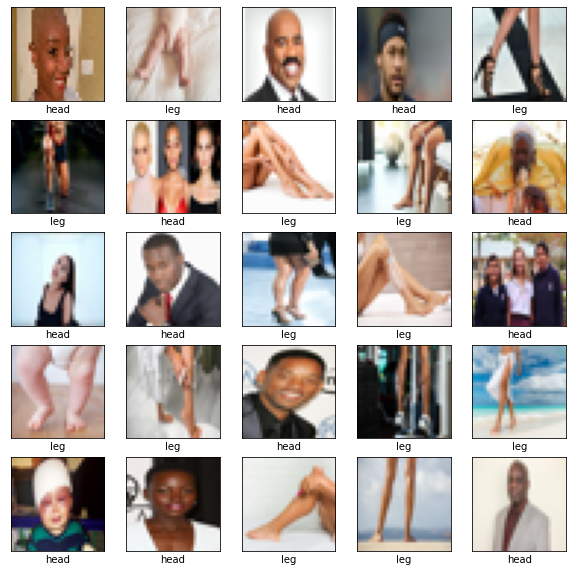

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], )
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [14]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=150, 
                    validation_data=(imagesToPredict, imagesToPredictLabels))

Epoch 1/150
4/4 [==============================] - 1s 166ms/step - loss: 45.2064 - accuracy: 0.4335 - val_loss: 5.7772e-05 - val_accuracy: 1.0000
Epoch 2/150
4/4 [==============================] - 0s 35ms/step - loss: 4.7805 - accuracy: 0.4645 - val_loss: 9.5872e-05 - val_accuracy: 1.0000
Epoch 3/150
4/4 [==============================] - 0s 35ms/step - loss: 2.9879 - accuracy: 0.5481 - val_loss: 5.2467 - val_accuracy: 0.0000e+00
Epoch 4/150
4/4 [==============================] - 0s 39ms/step - loss: 2.1558 - accuracy: 0.4865 - val_loss: 0.6062 - val_accuracy: 0.6667
Epoch 5/150
4/4 [==============================] - 0s 38ms/step - loss: 0.5658 - accuracy: 0.7720 - val_loss: 1.9077 - val_accuracy: 0.6667
Epoch 6/150
4/4 [==============================] - 0s 37ms/step - loss: 0.4436 - accuracy: 0.7932 - val_loss: 0.6632 - val_accuracy: 0.6667
Epoch 7/150
4/4 [==============================] - 0s 40ms/step - loss: 0.5006 - accuracy: 0.7679 - val_loss: 2.6462 - val_accuracy: 0.3333
Epoch 

Epoch 59/150
4/4 [==============================] - 0s 43ms/step - loss: 6.6377e-04 - accuracy: 1.0000 - val_loss: 5.1677 - val_accuracy: 0.3333
Epoch 60/150
4/4 [==============================] - 0s 42ms/step - loss: 6.7192e-04 - accuracy: 1.0000 - val_loss: 5.0310 - val_accuracy: 0.3333
Epoch 61/150
4/4 [==============================] - 0s 43ms/step - loss: 7.1943e-04 - accuracy: 1.0000 - val_loss: 4.8942 - val_accuracy: 0.3333
Epoch 62/150
4/4 [==============================] - 0s 41ms/step - loss: 7.1061e-04 - accuracy: 1.0000 - val_loss: 4.9900 - val_accuracy: 0.3333
Epoch 63/150
4/4 [==============================] - 0s 33ms/step - loss: 6.1669e-04 - accuracy: 1.0000 - val_loss: 5.1517 - val_accuracy: 0.3333
Epoch 64/150
4/4 [==============================] - 0s 39ms/step - loss: 6.6353e-04 - accuracy: 1.0000 - val_loss: 5.1737 - val_accuracy: 0.3333
Epoch 65/150
4/4 [==============================] - 0s 83ms/step - loss: 5.8171e-04 - accuracy: 1.0000 - val_loss: 5.1157 - val_ac

4/4 [==============================] - 0s 41ms/step - loss: 1.7247e-04 - accuracy: 1.0000 - val_loss: 6.5603 - val_accuracy: 0.3333
Epoch 116/150
4/4 [==============================] - 0s 40ms/step - loss: 1.4693e-04 - accuracy: 1.0000 - val_loss: 6.5486 - val_accuracy: 0.3333
Epoch 117/150
4/4 [==============================] - 0s 36ms/step - loss: 1.5341e-04 - accuracy: 1.0000 - val_loss: 6.5655 - val_accuracy: 0.3333
Epoch 118/150
4/4 [==============================] - 0s 38ms/step - loss: 1.4716e-04 - accuracy: 1.0000 - val_loss: 6.6429 - val_accuracy: 0.3333
Epoch 119/150
4/4 [==============================] - 0s 38ms/step - loss: 1.2662e-04 - accuracy: 1.0000 - val_loss: 6.7432 - val_accuracy: 0.3333
Epoch 120/150
4/4 [==============================] - 0s 37ms/step - loss: 1.2899e-04 - accuracy: 1.0000 - val_loss: 6.8058 - val_accuracy: 0.3333
Epoch 121/150
4/4 [==============================] - 0s 44ms/step - loss: 1.2353e-04 - accuracy: 1.0000 - val_loss: 6.7866 - val_accuracy:

1/1 - 0s - loss: 2.1641 - accuracy: 0.8000


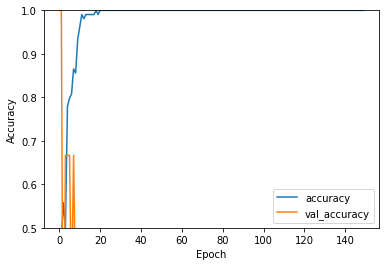

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [47]:
# Save ethe model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'




In [52]:
#load the model

model = keras.models.load_model('my_model.h5')


In [53]:
model.evaluate(test_images,test_labels, verbose=2)

1/1 - 0s - loss: 2.1641 - accuracy: 0.8000


[2.1640586853027344, 0.800000011920929]

In [54]:
test_loss,test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("Accuracy is ", test_acc)

1/1 - 0s - loss: 2.1641 - accuracy: 0.8000
Accuracy is  0.800000011920929


In [55]:
prediction=model.predict(imagesToPredict)


In [56]:
prediction[0]

array([16.6512   ,  1.4209445], dtype=float32)

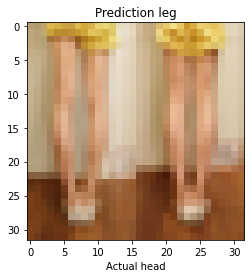

In [57]:

plt.grid(False)
plt.imshow(imagesToPredict[0])

plt.xlabel("Actual "+ class_names[imagesToPredictLabels[0]])
plt.title("Prediction "+ class_names[np.argmax(prediction[0])])
plt.show()




In [24]:
len(imagesToPredict)

3

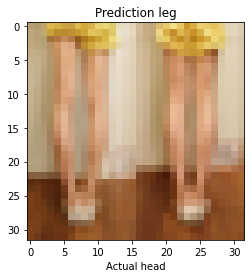

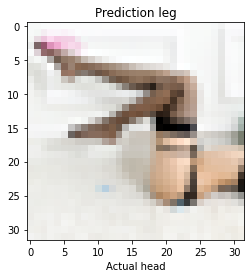

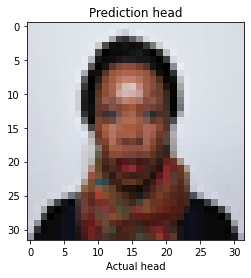

In [25]:
for i in range(len(imagesToPredict)):
    plt.grid(False)
    plt.imshow(imagesToPredict[i], cmap=plt.cm.binary)
    plt.xlabel("Actual "+ class_names[imagesToPredictLabels[i]])
    plt.title("Prediction "+ class_names[np.argmax(prediction[i])])
    plt.show()